In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as pe
from matplotlib.ticker import FormatStrFormatter

import utils

In [2]:
name_A = 'Luhman 16A'; name_B = 'Luhman 16B' # name_A = 'WISE 1049A'; name_B = 'WISE 1049B'
#color_A = '0.45'; color_B = '0.0'
lw_d = 0.8

#color_m = 'C1'
#color_m_A = 'C0'; color_m_B = 'C3'
#color_m_A = '#FF7B2E'; color_m_B = '#396ED8'
#color_A = '#FF7B2E'; color_B = '#396ED8'
#color_m_A = '#FF4A2E'; color_m_B = '#396ED8'
#color_A = '#FF4A2E'; color_B = '#396ED8'
lw_m = 1.0

In [3]:
Res_A = utils.RetrievalResults(
    prefix='../retrieval_outputs/fiducial_J_A_ret_11/test_', 
    m_set='J1226_A', w_set='J1226', load_posterior=True
    )
d_spec_A = Res_A._load_object('d_spec', bestfit_prefix=False)

Res_B = utils.RetrievalResults(
    prefix='../retrieval_outputs/fiducial_J_B_ret_36/test_', 
    m_set='J1226_A', w_set='J1226', load_posterior=True
    )
d_spec_B = Res_B._load_object('d_spec', bestfit_prefix=False)

  analysing data from ../retrieval_outputs/fiducial_J_A_ret_11/test_.txt
  analysing data from ../retrieval_outputs/fiducial_J_B_ret_36/test_.txt


## Observations

In [4]:
def indicate_ghost(
        ax, v_bary, show_text=True, #cmap=mpl.colors.LinearSegmentedColormap.from_list('',['0.85','1.0'])
        cmap=mpl.colors.LinearSegmentedColormap.from_list('',['0.9','1.0'])
        ):
    
    ghosts = np.array([
        [1119.44,1120.33], [1142.78,1143.76], [1167.12,1168.08], 
        [1192.52,1193.49], [1219.01,1220.04], [1246.71,1247.76], 
        [1275.70,1276.80], [1306.05,1307.15], [1337.98,1338.94], 
    ])
    ghosts += np.array([-0.1,+0.1])
    ghosts *= (1+v_bary/3e5)

    ylim = ax.get_ylim()
    height = np.abs(np.diff(ylim))
    for ghost_i in ghosts:
        # Plot the masked wavelengths due to the ghost signature        
        Z = np.abs(np.linspace(*ghost_i, 20) - ghost_i.mean())
        ax.imshow(
            Z.reshape(-1,1).T, cmap=cmap, vmin=0, vmax=Z.max(), 
            extent=[*ghost_i, *ylim], interpolation='bilinear', 
            aspect='auto', zorder=-1
            )
        if show_text:
            ax.annotate(
                'ghost', xy=(ghost_i.mean(),ylim[0]+0.07*height), rotation=90, 
                ha='center', va='bottom', fontsize=9, color='0.4'
            )
        
def indicate_lines(ax, x, y, label, label_y=None):

    X = np.array([x[0],x[0],x[1],x[1]])
    Y = np.array([y[0],y[1],y[1],y[0]])
    ax.plot(X, Y, c='k', lw=1, transform=ax.get_xaxis_transform())

    text_kwargs = dict(ha='center', va='center', fontsize=12)
    if label_y is None:
        label_y = y[1]
        text_kwargs['bbox'] = {'boxstyle':'square', 'ec':'none', 'fc':'w'}

    ax.text(x=x.mean(), y=label_y, s=label, transform=ax.get_xaxis_transform(), **text_kwargs)

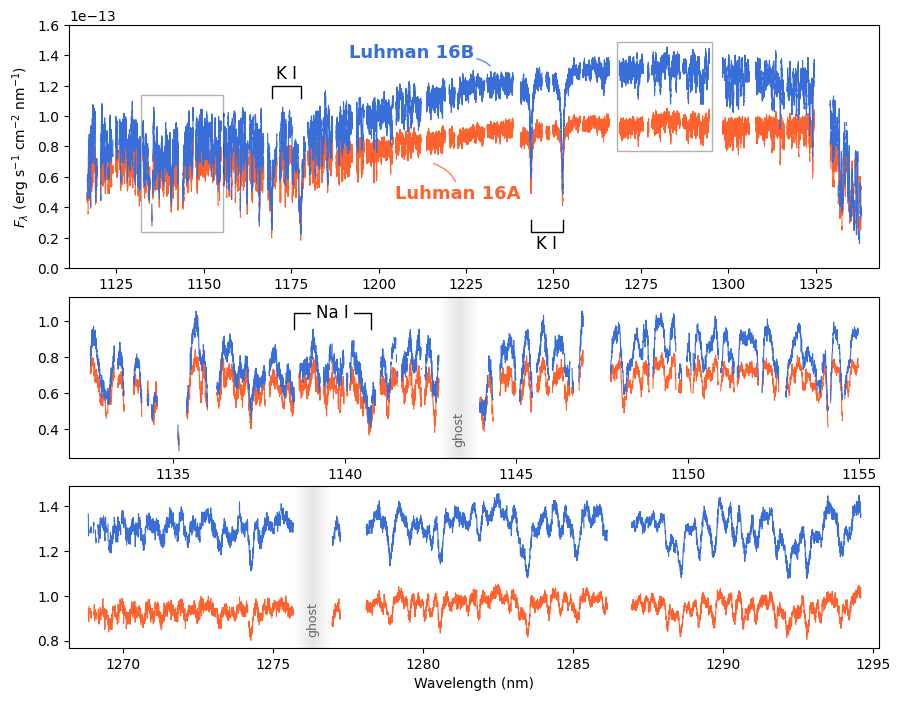

In [5]:
#color_m_A = '#FF7B2E'; color_m_B = '#396ED8'
#color_A = '#FF7B2E'; color_B = '#396ED8'
color_m_A = '#FF622E'; color_m_B = '#396ED8'
color_A = '#FF622E'; color_B = '#396ED8'

scale = 1e-13
orders_to_plot = [[0,1],6]

fig = plt.figure(figsize=(9,7))
gs = fig.add_gridspec(
    nrows=3, ncols=1, hspace=0.15, wspace=0, height_ratios=[0.43,(1-0.43)/2,(1-0.43)/2], 
)
ax = np.array([
    fig.add_subplot(gs[0,0]), 
    fig.add_subplot(gs[1,0]), 
    fig.add_subplot(gs[2,0]), 
])
for i in range(d_spec_B.n_orders):
    for j in range(d_spec_B.n_dets):
        #ax[0].plot(d_spec_B.wave[i,j], d_spec_B.flux_uncorr[i,j]/d_spec_B.transm[i,j], c='k', lw=0.5, alpha=0.3)
        try:
            ax[0].plot(d_spec_A.wave[i,j], d_spec_A.flux[i,j], c=color_A, lw=lw_d)
        except:
            pass

        ax[0].plot(d_spec_B.wave[i,j], d_spec_B.flux[i,j], c=color_B, lw=lw_d)

        if i in orders_to_plot[0]:
            ax[1].plot(d_spec_A.wave[i,j], d_spec_A.flux[i,j]/scale, c=color_A, lw=lw_d)
            ax[1].plot(d_spec_B.wave[i,j], d_spec_B.flux[i,j]/scale, c=color_B, lw=lw_d)
            #ax[1].set(
            #    xlim=(d_spec_A.wave[i,:].min()-0.5,d_spec_A.wave[i,:].max()+0.5)
            #    )

        if i == orders_to_plot[1]:
            ax[2].plot(d_spec_A.wave[i,j], d_spec_A.flux[i,j]/scale, c=color_A, lw=lw_d)
            ax[2].plot(d_spec_B.wave[i,j], d_spec_B.flux[i,j]/scale, c=color_B, lw=lw_d)
            ax[2].set(
                xlim=(d_spec_A.wave[i,:].min()-0.5,d_spec_A.wave[i,:].max()+0.5)
                )

ax[1].set(
    xlim=(
        d_spec_A.wave[orders_to_plot[0],2].min()-0.5,
        d_spec_A.wave[orders_to_plot[0],1].max()+0.5
        )
    )

# Indicate alkali lines
wave_Na = np.array([1e7/8783.82852, 1e7/8766.63258]) * (1+d_spec_A.v_bary/3e5)
indicate_lines(ax[1], wave_Na, [0.8,0.9], label='Na I')

wave_K = np.array([1e7/8551.81787, 1e7/8491.80409]) * (1+d_spec_A.v_bary/3e5)
indicate_lines(ax[0], wave_K, [0.7,0.75], label='K I', label_y=0.8)

wave_K = np.array([1e7/7983.67489, 1e7/8041.38112]) * (1+d_spec_A.v_bary/3e5)
indicate_lines(ax[0], wave_K, [0.2,0.15], label='K I', label_y=0.1)

ax[0].set(xticks=np.arange(1100,1350+1,25))
ax[0].set(
    xlim=(d_spec_B.wave.min()-5,d_spec_B.wave[:,0].max()+5), ylim=(0,1.6e-13), 
    ylabel=r'$F_\lambda\ \mathrm{(erg\ s^{-1}\ cm^{-2}\ nm^{-1})}$', 
    )
ax[-1].set(xlabel=r'Wavelength (nm)')

for ax_i in ax[1:]:

    # Plot the inset rectangle(s)
    x0 = ax_i.get_xlim()[0]
    y0 = ax_i.get_ylim()[0]
    width  = np.abs(ax_i.get_xlim()[1] - x0)
    height = np.abs(ax_i.get_ylim()[1] - y0)
    bounds = (x0, y0*scale, width, height*scale)

    _, con_patch = ax[0].indicate_inset(
        bounds=bounds, inset_ax=ax_i, edgecolor='k', alpha=0.3, 
        )
    #for con_patch_j in con_patch:
    #    con_patch_j.set_visible(False)
    [con_patch_j.set_visible(False) for con_patch_j in con_patch]

    # Plot the masked wavelengths due to the ghost signature
    indicate_ghost(ax_i, v_bary=d_spec_A.v_bary)


ax[0].annotate(
    name_A, xy=(0.45,0.43), xytext=(0.48,0.27), xycoords='axes fraction', 
    ha='center', va='bottom', c=color_A, fontsize=13, fontweight='bold', 
    arrowprops={
        'arrowstyle':'-', 'connectionstyle':'angle3,angleA=90,angleB=-20', 
        'shrinkA':0, 'shrinkB':0, 'lw':1, 'color':color_A, 'alpha':0.8, 
        }, 
    )

ax[0].annotate(
    name_B, xy=(0.52,0.83), xytext=(0.5,0.85), xycoords='axes fraction', 
    ha='right', va='bottom', c=color_B, fontsize=13, fontweight='bold', 
    arrowprops={
        'arrowstyle':'-', 'connectionstyle':'angle3,angleA=0,angleB=-50', 
        'shrinkA':0, 'shrinkB':0, 'lw':1, 'color':color_B, 'alpha':0.8, 
        }, 
    )

plt.subplots_adjust(left=0.08, bottom=0.07, top=0.96, right=0.98)
plt.savefig('./plots/J_band_spectrum.pdf')
plt.show()

## Best-fitting model

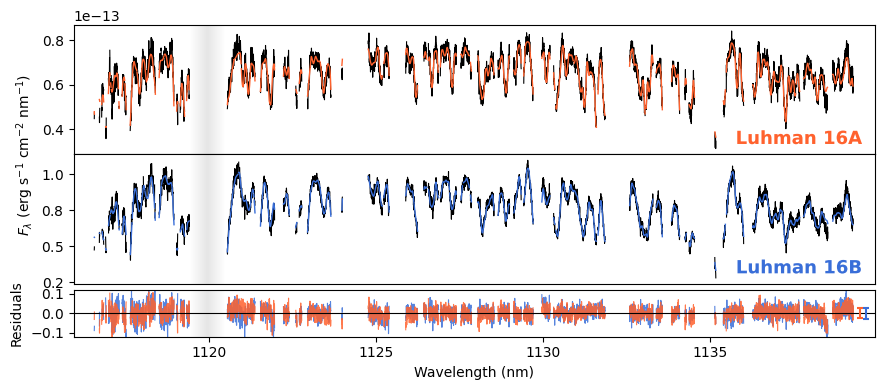

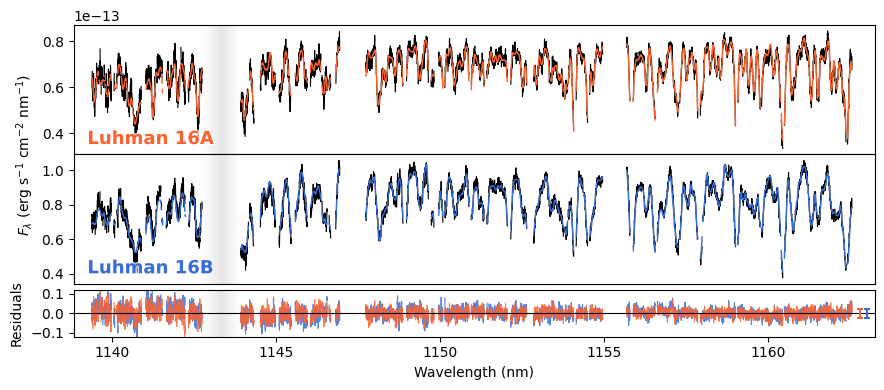

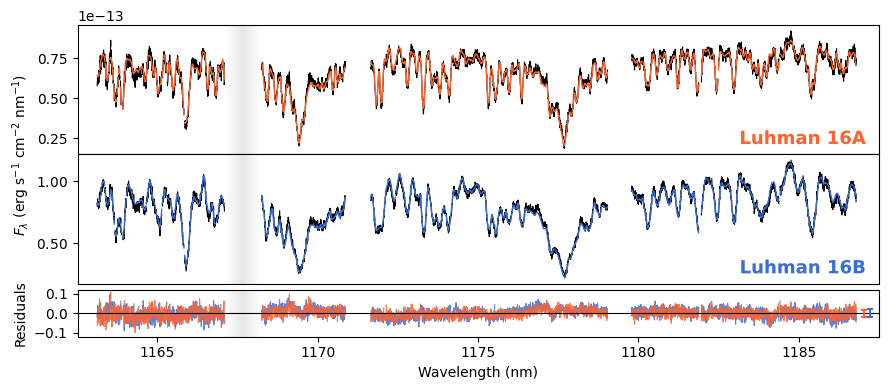

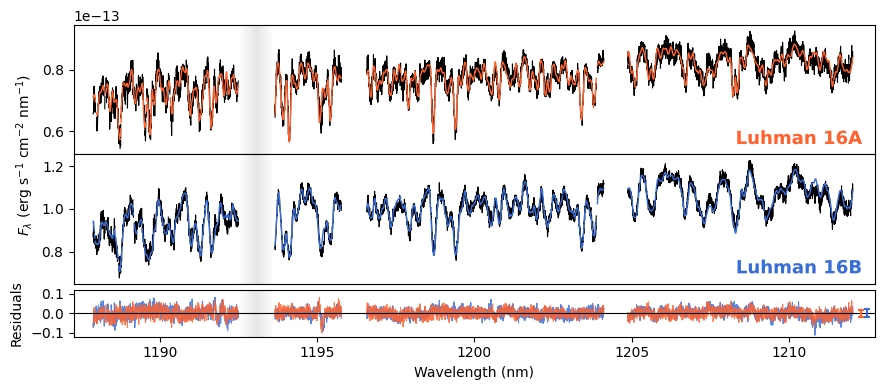

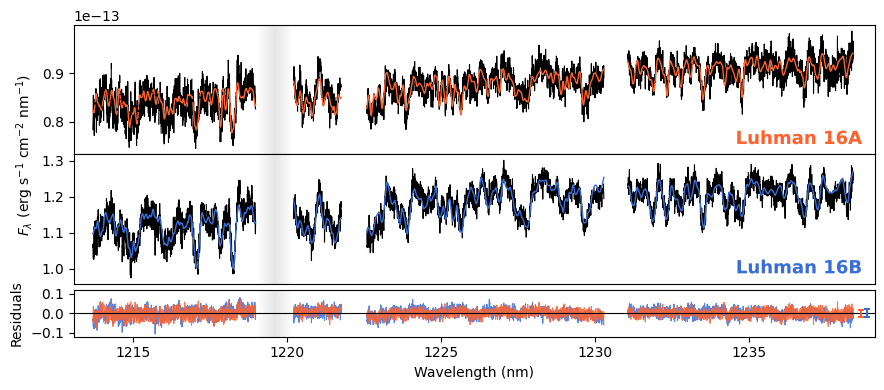

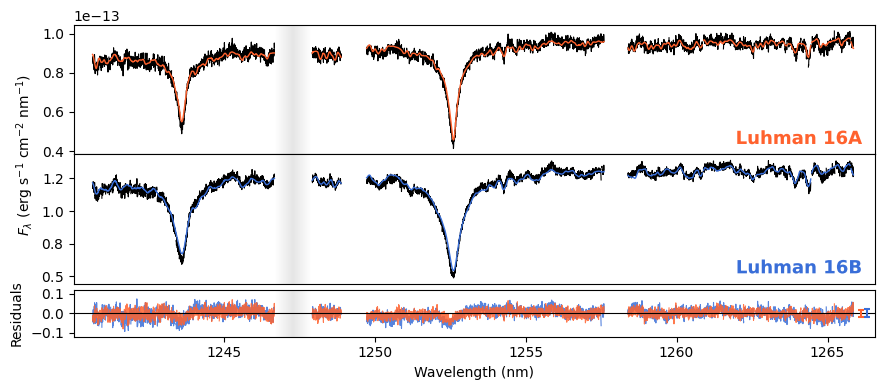

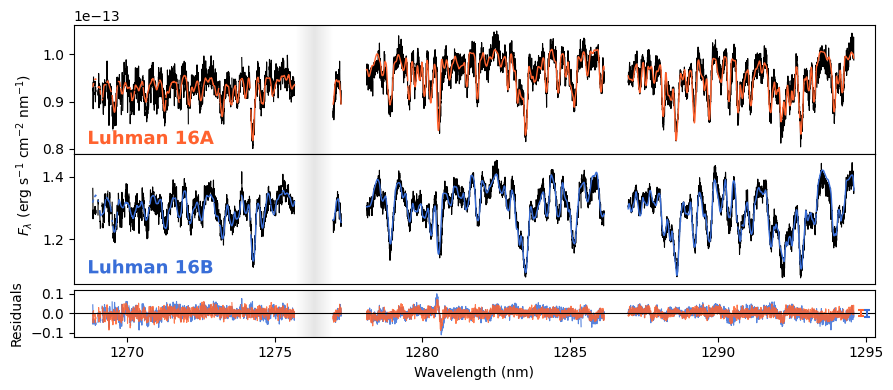

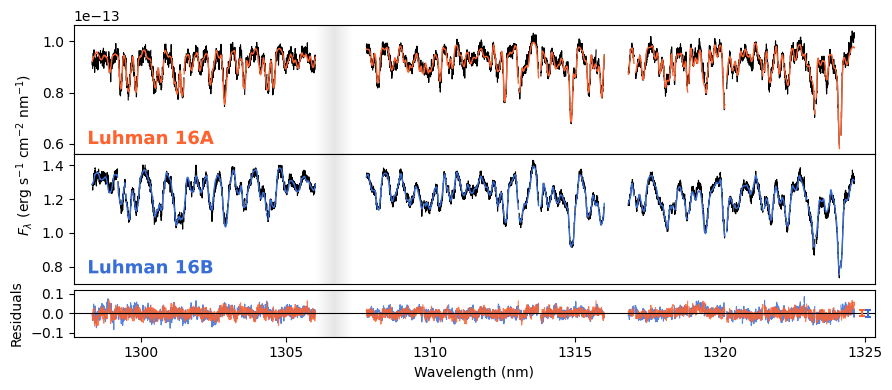

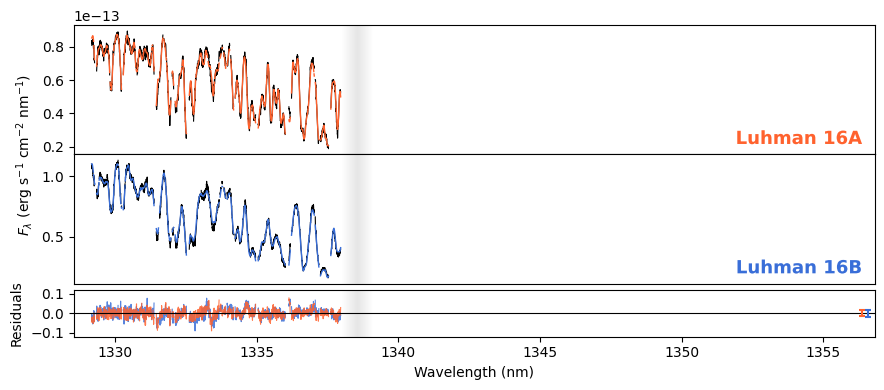

In [6]:
#color_A = color_B
color_A = '0.0'; color_B = '0.0'
res_alpha = 0.85

LogLike_A = Res_A._load_object('LogLike', bestfit_prefix=True)
LogLike_B = Res_B._load_object('LogLike', bestfit_prefix=True)

sigma_A = Res_A.get_mean_scaled_uncertainty()
sigma_B = Res_B.get_mean_scaled_uncertainty()

#i = 8
for i in range(9):

    fig = plt.figure(figsize=(9,3.8))
    gs = fig.add_gridspec(
        nrows=4, ncols=1, hspace=0.0, wspace=0, height_ratios=[(0.85-0.02)/2,(0.85-0.02)/2,0.02,0.15], 
    )
    ax = np.array([
        fig.add_subplot(gs[0,0]), 
        fig.add_subplot(gs[1,0]), 
        fig.add_subplot(gs[3,0]), 
    ])
    for j in range(d_spec_B.n_dets):
        ax[0].plot(d_spec_A.wave[i,j], d_spec_A.flux[i,j], c=color_A, lw=lw_d)
        ax[0].plot(d_spec_A.wave[i,j], LogLike_A.m_flux_phi[i,j], c=color_m_A, lw=lw_m)
        
        ax[1].plot(d_spec_B.wave[i,j], d_spec_B.flux[i,j]/scale, c=color_B, lw=lw_d)
        ax[1].plot(d_spec_B.wave[i,j], LogLike_B.m_flux_phi[i,j]/scale, c=color_m_B, lw=lw_m)

        ax[-1].plot(
            d_spec_B.wave[i,j], (d_spec_B.flux[i,j]-LogLike_B.m_flux_phi[i,j])/scale, 
            c=color_m_B, lw=lw_d, alpha=res_alpha
            )
        ax[-1].plot(
            d_spec_A.wave[i,j], (d_spec_A.flux[i,j]-LogLike_A.m_flux_phi[i,j])/scale, 
            c=color_m_A, lw=lw_d, alpha=res_alpha
            )
        
    for j, ax_j in enumerate(ax):

        # Axis limits
        if j != len(ax)-1:
            ax_j.set(xticks=[])
        else:
            ax_j.set(ylim=(-0.12,0.12))
        ax_j.set(xlim=(d_spec_A.wave[i,:].min()-0.5,d_spec_A.wave[i,:].max()+0.6))

        '''
        if j == 0:
            # Share ylim
            ylim0 = np.asarray(ax[0].get_ylim())/scale
            ylim1 = np.asarray(ax[1].get_ylim())

            ylim = np.array([min([ylim0[0], ylim1[0]]), max([ylim0[1], ylim1[1]])])
            ax[0].set(ylim=ylim*scale); ax[1].set(ylim=ylim)
        '''
        indicate_ghost(ax_j, v_bary=d_spec_A.v_bary, show_text=False)

    # Errorbar
    ax[-1].axhline(0.0, c=color_B, lw=ax[-1].spines['left'].get_lw())
    ax[-1].errorbar(
        d_spec_A.wave[i,:].max()+0.15, 0.0, yerr=sigma_A[i,0]/scale, 
        c=color_m_A, capsize=2, lw=1.5, capthick=1.5
        )
    ax[-1].errorbar(
        d_spec_A.wave[i,:].max()+0.35, 0.0, yerr=sigma_B[i,0]/scale, 
        c=color_m_B, capsize=2, lw=1.5, capthick=1.5
        )

    # Axis ticks
    ax[0].ticklabel_format(axis='y', style='sci', scilimits=(-13,-13))

    decimals0 = [
        len(label_i.get_text().rsplit('.')[1]) \
        for label_i in ax[0].get_yticklabels()
    ]
    decimals1 = [
        len(label_i.get_text().rsplit('.')[1]) \
        for label_i in ax[1].get_yticklabels()
    ]

    decimals = max([*decimals0,*decimals1])
    decimals = max([*decimals0])

    ax[1].yaxis.set_major_formatter(FormatStrFormatter(r'$%.'+str(decimals)+'f$'))
    ax[-1].yaxis.set_major_formatter(FormatStrFormatter(r'$%.1f$'))

    ha = 'left'; xy = (0.017,0.05)
    if i in [0, 2,3,4,5, 8]:
        ha = 'right'; xy = (1-0.017,0.05)

    # Name labels
    ax[0].annotate(
        name_A, xy=xy, xycoords='axes fraction', 
        ha=ha, va='bottom', c=color_m_A, fontsize=13, fontweight='bold', 
        path_effects=[pe.withStroke(linewidth=2, foreground='w', alpha=0.8)]
        )
    ax[1].annotate(
        name_B, xy=xy, xycoords='axes fraction', 
        ha=ha, va='bottom', c=color_m_B, fontsize=13, fontweight='bold', 
        path_effects=[pe.withStroke(linewidth=2, foreground='w', alpha=0.8)]
        )
    
    # Axis labels
    ax[0].set_ylabel(r'$F_\lambda\ \mathrm{(erg\ s^{-1}\ cm^{-2}\ nm^{-1})}$', y=0)
    ax[-1].set(xlabel=r'Wavelength (nm)', ylabel='Residuals')

    plt.subplots_adjust(left=0.09, bottom=0.12, top=0.94, right=0.98)
    plt.savefig(f'./plots/J_band_spectrum_bestfit_order{i}.pdf')
    plt.show()

In [7]:
del LogLike_A, d_spec_A, Res_A

## Cross-correlation

Generating a model w/o FeH_main_iso
Generating a model with only FeH_main_iso


100%|██████████| 2001/2001 [00:19<00:00, 101.75it/s]


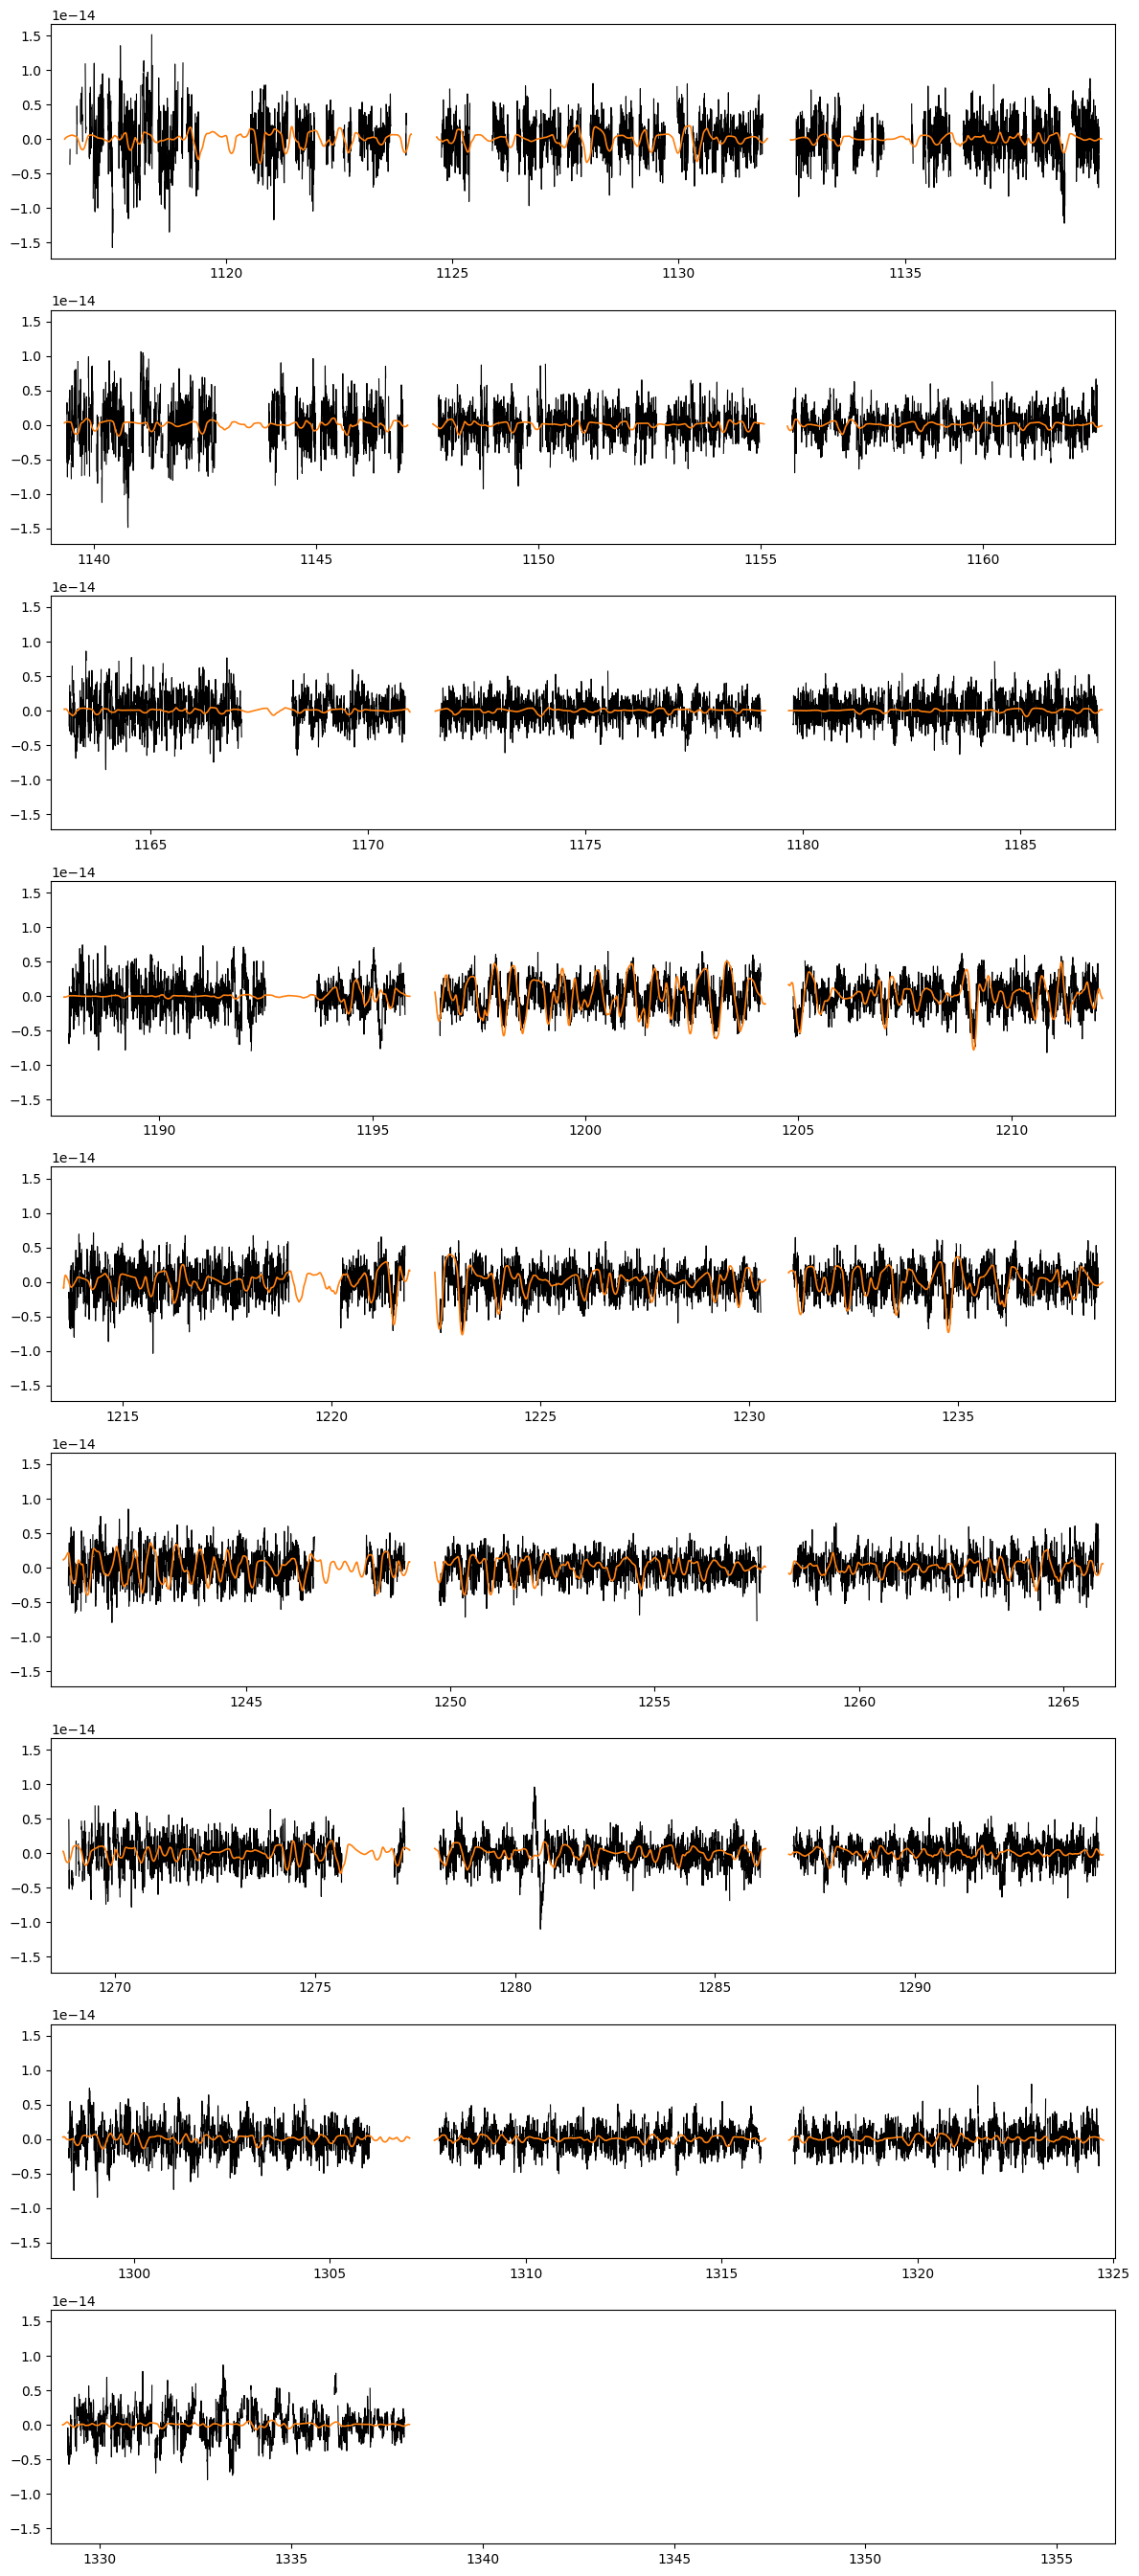

In [8]:
#line_species_j = 'HF_main_iso'
line_species_j = 'FeH_main_iso'

# Template spectrum w/o that species
wave, flux_wo_species = Res_B.get_model_spec(
    is_local=False, # Rotationally broadened
    line_species_to_exclude=line_species_j, 
    return_wave_flux=True, 
    )
# Template spectrum of a single species
_, flux_local = Res_B.get_model_spec(
    is_local=False, # Rotationally broadened
    line_species_to_include=line_species_j, 
    return_wave_flux=True, 
    )

# Compute cross-correlation
rv, _, CCF_SNR = Res_B.get_CCF(
    wave, flux_local, # Model template
    rv=np.arange(-1000,1000+1e-6,1), 
    model_to_subtract_from_d_res=flux_wo_species, #model_to_subtract_from_d_res=None, 
    model_to_subtract_from_m_res=None, 
    high_pass={
        'm_res': utils.high_pass_filter(window_length=301), # Filter on model
        'd_res': utils.high_pass_filter(window_length=301), # Filter on data
        }, 
    #plot=True, 
    rv_sep=300, # Separation to calculate std-dev from
    )
del flux_local

# Complete spectrum
_, flux = Res_B.get_model_spec(
    is_local=False, # Rotationally broadened
    line_species_to_exclude=None, 
    return_wave_flux=True, 
    )

In [11]:
color_species = {'HF_main_iso':'#FF59B4', 'FeH_main_iso':'#00DBA8'}.get(line_species_j)

#i = 0; j = 2
scale = 1e-13

width = 6
if line_species_j == 'HF_main_iso':
    wave_minmax = np.array([1262.7,1275.8])[:,None] + width/2*np.array([-1,1])[None,:]
    #wave_minmax = np.array([1262.5,1320])[:,None] + width/2*np.array([-1,1])[None,:]
    ax_res_ylim = (-5.5e-15,0.5e-15)
if line_species_j == 'FeH_main_iso':
    wave_minmax = np.array([1210,1235])[:,None] + width/2*np.array([-1,1])[None,:]
    ax_res_ylim = (-8e-15,0.7e-15)

fig = plt.figure(figsize=(9,3.5))
gs = fig.add_gridspec(
    nrows=2, ncols=3, hspace=0.24, wspace=0.04, 
    width_ratios=[0.36,0.36,0.28], height_ratios=[0.2,0.8], 
)
ax = np.array([
    fig.add_subplot(gs[-1,0]), 
    fig.add_subplot(gs[-1,1]), 
])
ax_res = fig.add_subplot(gs[0,:2])

for h, (wave_min_h, wave_max_h) in enumerate(wave_minmax):

    for i in range(d_spec_B.n_orders):
        for j in range(d_spec_B.n_dets):

            wave_ij = d_spec_B.wave[i,j]

            y1 = np.interp(
                wave_ij, xp=wave[i], fp=flux[i]*LogLike_B.phi[i,j]
            )        
            y2 = np.interp(
                wave_ij, xp=wave[i], fp=flux_wo_species[i]*LogLike_B.phi[i,j]
            )
            ax_res.plot(wave_ij, (y1-y2), c=color_species, lw=lw_m)
            
            if not ((wave_ij<wave_max_h) & (wave_ij>wave_min_h)).any():
                continue

            ax[h].plot(wave_ij, d_spec_B.flux[i,j]/scale, c=color_B, lw=lw_d, zorder=-1)

            # Models
            ax[h].fill_between(wave_ij, y1/scale, y2/scale, color=color_species, lw=lw_m, alpha=0.6)
            ax[h].plot(wave_ij, y2/scale, c=color_species, lw=lw_m)
            ax[h].plot(wave_ij, y1/scale, c=color_m_B, lw=lw_m)

    ax[h].set(xlim=(wave_min_h-0.1, wave_max_h+0.1))

ax_res.ticklabel_format(axis='y', style='sci', scilimits=(-13,-13))
#ax_res.set(xticks=np.arange(1100,1350+1,25))
ax_res.set(
    xlim=(d_spec_B.wave.min()-5,d_spec_B.wave[:,0].max()+5), 
    ylim=ax_res_ylim, ylabel=r'$\mathrm{Res.}$'
    )

for ax_i in ax:
    # Indicate the location of the zoom-ins
    x0 = ax_i.get_xlim()[0]
    width  = np.abs(ax_i.get_xlim()[1] - x0)

    # Plot the inset rectangle(s)
    x0 = ax_i.get_xlim()[0]
    y0 = ax_res.get_ylim()[0]
    width  = np.abs(ax_i.get_xlim()[1] - x0)
    height = np.abs(ax_i.get_ylim()[1] - y0)
    bounds = (x0, y0, width, 0)

    _, con_patch = ax_res.indicate_inset(
        bounds=bounds, inset_ax=ax_i, edgecolor='k', lw=2, alpha=1, clip_on=False, 
        )
    for con_patch_j in con_patch:
        if con_patch_j.xy1[1]==0:
            con_patch_j.set_visible(False)
            continue

        con_patch_j.set_visible(True)
        con_patch_j.set_linewidth(0.8)
        con_patch_j.set_alpha(0.2)

    # Plot the masked wavelengths due to the ghost signature
    indicate_ghost(
        ax_i, v_bary=d_spec_B.v_bary, show_text=False, 
        cmap=mpl.colors.LinearSegmentedColormap.from_list('',['0.9','1.0'])
        )

ylim = np.asarray([ax_i.get_ylim() for ax_i in ax])
for ax_i in ax:
    ax_i.set(ylim=(ylim[:,0].min(), ylim[:,1].max()))

ax[0].set(
    ylabel=r'$F_\lambda\ \mathrm{(erg\ s^{-1}\ cm^{-2}\ nm^{-1})}$'
    )
ax[0].set_xlabel(r'Wavelength (nm)', x=1)
ax[1].set(yticks=[])

plt.subplots_adjust(left=0.09, bottom=0.15, top=0.92, right=0.93)

_, y1, *_ = ax[1].get_position().extents
*_, x2, y2 = ax_res.get_position().extents

ax_CCF = fig.add_axes(rect=(x2+0.025,y1+0.12,0.93-(x2+0.025),y2-y1-2*0.12))
ax_CCF.plot(rv, CCF_SNR, c=color_species, lw=1.3)
ax_CCF.set(
    yticks=np.arange(-3,12,3), ylabel='CCF S/N', xlim=(-400,400), 
    xlabel=r'$v_\mathrm{rad}\ \mathrm{(km\ s^{-1})}$'
    )
ax_CCF.yaxis.set_label_position('right')
ax_CCF.yaxis.tick_right()

SNR_rv0 = CCF_SNR[rv==0.][0]
ax_CCF.annotate(
    r'S/N$=$'+'{:.1f}'.format(SNR_rv0), xy=(0,SNR_rv0-2), xytext=(-50,SNR_rv0-4), 
    color=color_species, ha='right', va='top', fontsize=10, fontweight='bold', 
    arrowprops={
        'arrowstyle':'-', 'connectionstyle':'angle3,angleA=70,angleB=0', 
        'shrinkA':4, 'shrinkB':6, 'lw':1, 'color':color_species, 'alpha':0.8, 
        }, 
    )

if line_species_j == 'HF_main_iso':
    ax_CCF.annotate(
        r'HF', xy=(0.95,0.95), color=color_species, ha='right', va='top', 
        fontsize=14, fontweight='bold', xycoords=ax_CCF.transAxes
        )
if line_species_j == 'FeH_main_iso':
    ax_CCF.annotate(
        r'FeH', xy=(0.95,0.95), color=color_species, ha='right', va='top', 
        fontsize=14, fontweight='bold', xycoords=ax_CCF.transAxes
        )

plt.savefig(f'./plots/J_band_spectrum_{line_species_j}.pdf')
plt.show()

NameError: name 'line_species_j' is not defined

## Abundance profiles

In [7]:
q = np.array([
    0.5-0.997/2, 0.5-0.95/2, 0.5-0.68/2, 0.5, 
    0.5+0.68/2, 0.5+0.95/2, 0.5+0.997/2
    ])

In [8]:
print(
    '{:.1f} ({:.1f})(+{:.1f})'.format(
        np.median(10**Res_A.posterior[:,7]), 
        *(np.quantile(10**Res_A.posterior[:,7], q=q[[2,4]])-np.median(10**Res_A.posterior[:,7]))
    )
)
print(
    '{:.1f} ({:.1f})(+{:.1f})'.format(
        np.median(10**Res_B.posterior[:,7]), 
        *(np.quantile(10**Res_B.posterior[:,7], q=q[[2,4]])-np.median(10**Res_B.posterior[:,7]))
    )
)

9.1 (-0.4)(+0.5)
20.2 (-2.0)(+2.6)


In [9]:
Chem_A = Res_A._load_object('Chem')
Chem_B = Res_B._load_object('Chem')

PT_A = Res_A._load_object('PT')
PT_B = Res_B._load_object('PT')

contr_A = np.load(f'{Res_A.prefix}data/bestfit_int_contr_em_{Res_A.m_set}.npy')
contr_B = np.load(f'{Res_B.prefix}data/bestfit_int_contr_em_{Res_B.m_set}.npy')

opa_posterior_A, opa_bestfit_A, fine_pressure = Res_A.get_grey_cloud_opacity(
    keys_indices={'log_opa_base_gray':6, 'log_P_base_gray':7, 'f_sed_gray':8}
    #keys_indices={
    #    'log_opa_base_gray_0':6, 'log_P_base_gray_0':7, 'f_sed_gray_0':8, 
    #    'log_opa_base_gray_0':9, 'log_P_base_gray_0':10, 'f_sed_gray_0':11, 
    #    }
    )
opa_posterior_B, opa_bestfit_B, fine_pressure = Res_B.get_grey_cloud_opacity(
    keys_indices={'log_opa_base_gray':6, 'log_P_base_gray':7, 'f_sed_gray':8}
    )

opa_envelope_A = np.quantile(opa_posterior_A, q=q, axis=0)
opa_envelope_B = np.quantile(opa_posterior_B, q=q, axis=0)

In [10]:
def convert_mf_dict_to_VMR_dict(Chem, relative_to_key=None):

    VMR = {}
    for pRT_name_i, mass_fractions_i in Chem.mass_fractions_posterior.items():
        print(pRT_name_i)

        if pRT_name_i == 'MMW':
            continue
        
        # Read mass of current species
        mask = (Chem.species_info.pRT_name == pRT_name_i)
        species_i = Chem.species_info.index[mask].tolist()[0]

        mass_i = Chem.read_species_info(species=species_i, info_key='mass')
        
        # Convert from mass fraction to VMR
        VMR[species_i] = Chem.mass_fractions_posterior['MMW'] / mass_i * mass_fractions_i

    print()
    
    if relative_to_key is None:
        return VMR

    VMR_rel = VMR[relative_to_key]
    VMR = {species_i: VMR_i/VMR_rel for species_i, VMR_i in VMR.items()}
    return VMR

VMR_posterior_A = convert_mf_dict_to_VMR_dict(Chem_A, relative_to_key='H2O')
VMR_posterior_B = convert_mf_dict_to_VMR_dict(Chem_B, relative_to_key='H2O')

VMR_envelope_A = {
    species_i: np.quantile(VMR_i, q=q, axis=0) for species_i, VMR_i in VMR_posterior_A.items()
}
VMR_envelope_B = {
    species_i: np.quantile(VMR_i, q=q, axis=0) for species_i, VMR_i in VMR_posterior_B.items()
}

H2O_pokazatel_main_iso_Sam_new
FeH_main_iso_Sam
HF_main_iso_new
K
Na_allard_recomputed
He
H2
MMW

H2O_pokazatel_main_iso_Sam_new
FeH_main_iso_Sam
HF_main_iso_new
K
Na_allard_recomputed
He
H2
MMW



Stoichiometry of species Tc1+ incomplete. Neglected!
Stoichiometry of species Tc1- incomplete. Neglected!
Stoichiometry of species Tc1++ incomplete. Neglected!

FastChem initialisation summary:
  number of species: 938    elements: 80    molecules: 672    condensates: 186



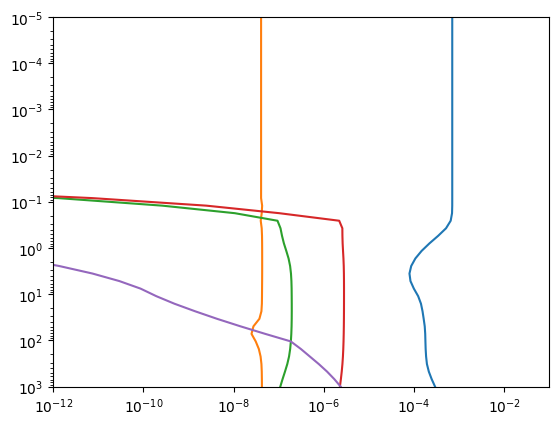

In [11]:
import pyfastchem as pyfc
import os
import petitRADTRANS.nat_cst as nc

class FastChemistry():

    def __init__(self, pressures):

        self.pressures = pressures

        pyfc_path = os.path.dirname(pyfc.__file__)

        self.fastchem = pyfc.FastChem(
            f'{pyfc_path}/input/element_abundances/asplund_2020_extended.dat', 
            f'{pyfc_path}/input/logK/logK_extended.dat',
            f'{pyfc_path}/input/logK/logK_condensates.dat', 
            1)

        # Create in/out-put structures for FastChem
        self.input = pyfc.FastChemInput()
        self.input.pressure = self.pressures[::-1] # Flip to decrease

        self.output = pyfc.FastChemOutput()

        # Use equilibrium condensation
        self.input.equilibrium_condensation = True
        # Use rainout condensation approach
        self.input.rainout_condensation     = True

        # Configure FastChem's internal parameters
        self.fastchem.setParameter('accuracyChem', 1e-5)
        #self.fastchem.setParameter('accuracyElementConservation', 1e-5)
        #self.fastchem.setParameter('accuracyNewton', 1e-5)
        
        self.fastchem.setParameter('nbIterationsChem', 10000)
        #self.fastchem.setParameter('nbIterationsNewton', 10000)
        #self.fastchem.setParameter('nbIterationsNelderMead', 10000)

        # ------------------------------------------------------------------

        # Make a copy of the solar abundances from FastChem
        self.solar_abundances = np.array(self.fastchem.getElementAbundances())

        # Indices of carbon-bearing species
        self.index_C = np.array(self.fastchem.getElementIndex('C'))
        self.index_O = np.array(self.fastchem.getElementIndex('O'))

        # Compute the solar C/O ratio
        self.CO_solar = self.solar_abundances[self.index_C] / \
            self.solar_abundances[self.index_O]

        # Indices of H/He-bearing species
        index_H  = np.array(self.fastchem.getElementIndex('H'))
        index_He = np.array(self.fastchem.getElementIndex('He'))

        self.mask_metal = np.ones_like(self.solar_abundances, dtype=bool)
        self.mask_metal[index_H]  = False
        self.mask_metal[index_He] = False

    def get_VMR(self, species_i):
        index = self.fastchem.getGasSpeciesIndex(species_i)
        return self.VMR[:,index]
    
    def get_condensate_number_density(self, species_i):
        index = self.fastchem.getCondSpeciesIndex(species_i)
        return np.array(self.output.number_densities_cond)[::-1,index]

    def __call__(self, T, CO, FeH):

        temperature = T * np.ones_like(self.pressures)
        temperature[temperature<200] = 200
        self.input.temperature = temperature[::-1] # Flip for FastChem usage

        # Make a copy to modify the elemental abundances
        element_abundances = self.solar_abundances.copy()
        metallicity_wrt_solar = 10**FeH

        # Apply C/O ratio and Fe/H to elemental abundances
        element_abundances[self.index_C] = \
            element_abundances[self.index_O] * CO / self.CO_solar
        element_abundances[self.mask_metal] *= metallicity_wrt_solar

        # Update the element abundances
        self.fastchem.setElementAbundances(element_abundances)

        # Compute the number densities
        fastchem_flag = self.fastchem.calcDensities(self.input, self.output)

        if fastchem_flag != 0:
            # FastChem failed to converge
            print('Failed to converge')
        if np.amin(self.output.element_conserved) != 1:
            # Failed element conservation
            print('Failed element conservation')

        # Compute the volume-mixing ratio of all species
        gas_number_density_tot = np.array(self.input.pressure)*1e6 / \
            (nc.kB * np.array(self.input.temperature))
        gas_number_density     = np.array(self.output.number_densities)

        self.VMR = gas_number_density / gas_number_density_tot[:,None]
        self.VMR = self.VMR[::-1] # Flip back

# Compute the chemical equilibrium abundances
FC = FastChemistry(pressures=PT_B.pressure)
FC(T=PT_B.temperature, CO=FC.CO_solar, FeH=0.0)

FC_VMR = {
    hill_i: FC.get_VMR(hill_i) for hill_i in ['H2O1', 'F1H1', 'Fe1H1', 'Na', 'K']
}

plt.plot(FC_VMR['H2O1'], PT_B.pressure)
plt.plot(FC_VMR['F1H1'], PT_B.pressure)
plt.plot(FC_VMR['K'], PT_B.pressure)
plt.plot(FC_VMR['Na'], PT_B.pressure)
plt.plot(FC_VMR['Fe1H1'], PT_B.pressure)

plt.yscale('log'); plt.xscale('log')
plt.ylim(1e3,1e-5); plt.xlim(1e-12,1e-1)
plt.show()

(1973.8668954730929, 6)
(1697.8346191498345, 1.0)
(1489.1475933273243, 0.05)
(1206.2920014630124, 0.01)


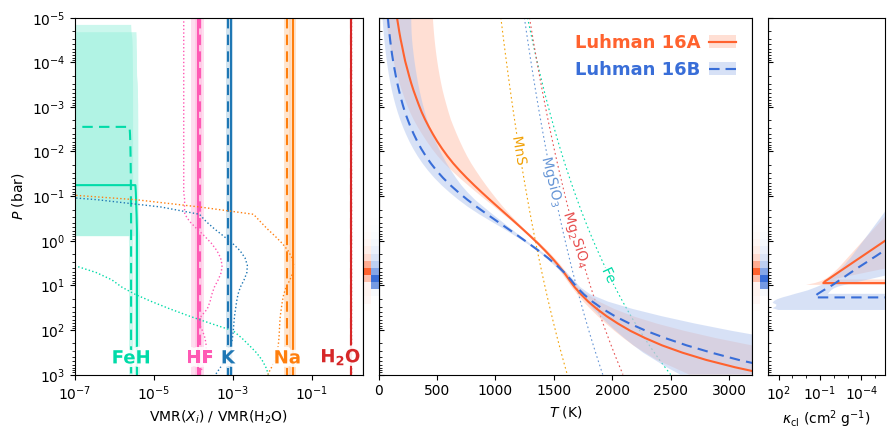

In [12]:
def plot_envelopes(ax, y, x, x_indices=[(0,6),(1,5),(2,4)], colors=['0.0','0.5','1.0'], median_kwargs=None):
    
    for i, (idx_l, idx_u) in enumerate(x_indices):

        patch = ax.fill_betweenx(
            y=y, x1=x[idx_l], x2=x[idx_u], fc=colors[i], ec='none'
            )
    
    if median_kwargs is not None:
        idx_m = median_kwargs.get('idx', 3)
        try:
            median_kwargs.pop('idx')
        except KeyError:
            pass

        line, = ax.plot(x[idx_m], y, **median_kwargs)

    return (line, patch, line)

def plot_condensation_curve(ax, pressure, species, FeH=0.0, ann_kwargs=None, **kwargs):

    coeffs = {
        'CaTiO3': [5.125, -0.277, -0.554], # Wakeford et al. (2017)
        'Fe': [5.44, -0.48, -0.48], # Visscher et al. (2010)
        'Mg2SiO4': [5.89, -0.37, -0.73], # Visscher et al. (2010)
        'MgSiO3': [6.26, -0.35, -0.70], # Visscher et al. (2010)
        'Cr': [6.576, -0.486, -0.486], # Morley et al. (2012)
        'KCl': [12.479, -0.879, -0.879], # Morley et al. (2012)
        'MnS': [7.45, -0.42, -0.84], # Visscher et al. (2006)
        'Na2S': [10.05, -0.72, -1.08], # Visscher et al. (2006)
        'ZnS': [12.52, -0.63, -1.26], # Visscher et al. (2006)
        'H2S': [86.49, -8.54, -8.54], # Visscher et al. (2006)
    }

    a, b, c = coeffs[species]
    y = a + b*np.log10(pressure) + c*FeH
    T = 1e4/y
    
    ax.plot(T, pressure, **kwargs, zorder=-2)

    if ann_kwargs is None:
        return
    
    y = ann_kwargs.get('y', 1e0)
    ann_kwargs['xy'] = (np.interp(np.log10(y),np.log10(pressure),T), y)
    print(ann_kwargs['xy'])
    ann_kwargs.pop('y')

    ax.annotate(**ann_kwargs, zorder=-1)

color_species = {'HF':'#FF59B4', 'FeH':'#00DBA8'}

cmap_m_A = mpl.colors.LinearSegmentedColormap.from_list('', ['w',color_m_A])
env_colors_m_A = cmap_m_A([0.4,0.6,0.8])
env_colors_m_A[:,3] = 0.5

cmap_m_B = mpl.colors.LinearSegmentedColormap.from_list('', ['w',color_m_B])
env_colors_m_B = cmap_m_B([0.4,0.6,0.8])
env_colors_m_B[:,3] = 0.5

median_kwargs_A = {'c':color_m_A, 'lw':1.5}
median_kwargs_B = {'c':color_m_B, 'lw':1.5, 'ls':(0,(5,3))}

fig = plt.figure(figsize=(9,4.3))
gs = fig.add_gridspec(
    #nrows=1, ncols=2, hspace=0.0, wspace=0.04, width_ratios=[0.5,0.5], 
    #nrows=1, ncols=3, hspace=0.0, wspace=0.06, width_ratios=[0.37,0.48,0.15], 
    nrows=1, ncols=5, hspace=0.0, wspace=0.0, width_ratios=[0.37,0.02,0.48,0.02,0.15], 
)
ax_VMR = fig.add_subplot(gs[0,0])
ax_PT  = fig.add_subplot(gs[0,2])
ax_cl  = fig.add_subplot(gs[0,4])

ax_contr = np.array([fig.add_subplot(gs[0,1]), fig.add_subplot(gs[0,3])])
for ax_i in ax_contr:
    ax_i.imshow(
        contr_A.reshape(-1,1), cmap=cmap_m_A, aspect='auto', interpolation='none', 
        extent=[0,0.5,0,1], transform=ax_i.transAxes, 
    )
    ax_i.imshow(
        contr_B.reshape(-1,1), cmap=cmap_m_B, aspect='auto', interpolation='none', 
        extent=[0.5,1,0,1], transform=ax_i.transAxes, 
    )
    ax_i.spines[['bottom','top']].set_visible(False)
    ax_i.set(yticks=[], xticks=[])

# --- PT -----------------------------------------------
handle_A = plot_envelopes(
    ax_PT, PT_A.pressure, x=PT_A.temperature_envelopes, x_indices=[(0,6)], 
    colors=[env_colors_m_A[0]], median_kwargs=median_kwargs_A, 
    )
handle_B = plot_envelopes(
    ax_PT, PT_B.pressure, x=PT_B.temperature_envelopes, x_indices=[(0,6)], 
    colors=[env_colors_m_B[0]], median_kwargs=median_kwargs_B, 
    )

ax_PT.legend(
    loc='upper right', bbox_to_anchor=(1,1), frameon=False, 
    handles=[handle_A,handle_B], labels=[name_A,name_B], 
    markerfirst=False, handlelength=1.5, handletextpad=0.5, 
    labelcolor='linecolor', prop={'weight':'bold', 'size':13    }, 
)
#ax_PT.annotate(
#    name_A, xy=(0.97,0.96), xycoords='axes fraction', 
#    ha='right', va='top', c=color_m_A, fontsize=13, fontweight='bold', 
#    path_effects=[pe.withStroke(linewidth=2, foreground='w', alpha=0.8)]
#    )
#ax_PT.annotate(
#    name_B, xy=(0.97,0.89), xycoords='axes fraction', 
#    ha='right', va='top', c=color_m_B, fontsize=13, fontweight='bold', 
#    path_effects=[pe.withStroke(linewidth=2, foreground='w', alpha=0.8)]
#    )

ann_kwargs = dict(
    text='Fe', y=6, clip_on=True, ha='center', va='center', 
    c=color_species['FeH'], fontsize=10, rotation=-65, #fontweight='bold', 
    path_effects=[pe.withStroke(linewidth=3, foreground='w')],
)
ls = (0,(1.5,2.5)); lw = 0.8
plot_condensation_curve(
    ax_PT, PT_A.pressure, species='Fe', ann_kwargs=ann_kwargs, lw=lw, ls=ls, c=ann_kwargs['c'], 
    )

ann_kwargs['text'] = r'$\mathrm{Mg_2SiO_4}$'
ann_kwargs['y'] = 1.; ann_kwargs['c'] = '#E75252'; ann_kwargs['rotation'] = -72
plot_condensation_curve(
    ax_PT, PT_A.pressure, species='Mg2SiO4', ann_kwargs=ann_kwargs, lw=lw, ls=ls, c=ann_kwargs['c'], 
    )

ann_kwargs['text'] = r'$\mathrm{MgSiO_3}$'
ann_kwargs['y'] = 5e-2; ann_kwargs['c'] = '#6796D6'; ann_kwargs['rotation'] = -76
plot_condensation_curve(
    ax_PT, PT_A.pressure, species='MgSiO3', ann_kwargs=ann_kwargs, lw=lw, ls=ls, c=ann_kwargs['c'], 
    )

ann_kwargs['text'] = r'$\mathrm{MnS}$'
ann_kwargs['y'] = 1e-2; ann_kwargs['c'] = '#F1A208'; ann_kwargs['rotation'] = -80
plot_condensation_curve(
    ax_PT, PT_A.pressure, species='MnS', ann_kwargs=ann_kwargs, lw=lw, ls=ls, c=ann_kwargs['c'], 
    )
'''
ann_kwargs['text'] = r'$\mathrm{Na_2S}$'
ann_kwargs['y'] = 1e2; ann_kwargs['c'] = 'g'; ann_kwargs['rotation'] = -82
plot_condensation_curve(
    ax_PT, PT_A.pressure, species='Na2S', ann_kwargs=ann_kwargs, lw=1, ls=':', c='g', 
    )

ann_kwargs['text'] = r'$\mathrm{KCl}$'
ann_kwargs['y'] = 1e2; ann_kwargs['c'] = 'g'; ann_kwargs['rotation'] = -82
plot_condensation_curve(
    ax_PT, PT_A.pressure, species='KCl', ann_kwargs=ann_kwargs, lw=1, ls=':', c='g', 
    )
'''

ax_PT.tick_params(axis='y', which='both', direction='in')

ax_PT.set(
    yscale='log', ylim=(1e3,1e-5), yticklabels=[], 
    xlim=(0,3200), xlabel=r'$T\ (\mathrm{K})$', xticks=np.arange(0,3500,500), 
    )

# --- Clouds -------------------------------------------
plot_envelopes(
    ax_cl, fine_pressure, x=opa_envelope_A, x_indices=[(0,6)], 
    colors=[env_colors_m_A[0]], median_kwargs=median_kwargs_A
    )
plot_envelopes(
    ax_cl, fine_pressure, x=opa_envelope_B, x_indices=[(0,6)], 
    colors=[env_colors_m_B[0]], median_kwargs=median_kwargs_B
    )

ax_cl.tick_params(axis='y', which='both', direction='in')

ax_cl.set(
    yscale='log', ylim=(1e3,1e-5), yticklabels=[], 
    xscale='log', xticks=10.**np.array([2,-1,-4]), xlim=(6e2,2e-6), 
    xlabel=r'$\kappa_\mathrm{cl}\ (\mathrm{cm^2\ g^{-1}})$'
    )
ax_cl.set_xticks([1e1,1e0,1e-2,1e-3,1e-5], labels=[], minor=True)

# --- VMR ----------------------------------------------
color_species = {'HF':'#FF59B4', 'FeH':'#00DBA8', 'H2O':'C3', 'K':'C0', 'Na':'C1'}
pos_x_species = {'HF':0.0, 'FeH':0.0, 'H2O':-0.26, 'K':+0., 'Na':0.0}
for species_i, hill_i in zip(['H2O','HF','FeH','K','Na'], ['H2O1','F1H1','Fe1H1','K','Na']):

    color_i = color_species.get(species_i, 'k')
    cmap = mpl.colors.LinearSegmentedColormap.from_list('', ['w',color_i])
    env_colors_i = cmap([0.4,0.6,0.8])
    env_colors_i[:,3] = 0.5
    
    median_kwargs_A['c'] = color_i
    median_kwargs_B['c'] = color_i

    plot_envelopes(
        ax_VMR, PT_A.pressure, x=VMR_envelope_A[species_i], x_indices=[(0,6)], 
        colors=[env_colors_i[0]], median_kwargs=median_kwargs_A
        )
    plot_envelopes(
        ax_VMR, PT_B.pressure, x=VMR_envelope_B[species_i], x_indices=[(0,6)], 
        colors=[env_colors_i[0]], median_kwargs=median_kwargs_B
        )
    
    ax_VMR.plot(FC_VMR[hill_i]/FC_VMR['H2O1'], PT_B.pressure, c=color_i, lw=1, ls=':')
    #mask_pressure = (PT_B.pressure < 20) & (PT_B.pressure > 1)
    #ax_VMR.plot(
    #    FC_VMR[hill_i]/np.nanmedian(FC_VMR['H2O1'][mask_pressure]), PT_B.pressure, c=color_i, lw=1, ls=':'
    #    )
    
    pos_x_i = pos_x_species.get(species_i, -0.2)
    
    ha = 'center'
    if pos_x_i > 0:
        ha = 'left'
    elif pos_x_i < 0:
        ha = 'right'

    pos_x_i += np.log10(VMR_envelope_B[species_i][3].max())
    pos_x_i = 10**pos_x_i

    ha = 'center' if species_i == 'H2O' else ha
    species_i = r'$\mathrm{\bf H_2O}$' if species_i == 'H2O' else species_i

    ax_VMR.annotate(
        species_i, xy=(pos_x_i, 0.02), xycoords=ax_VMR.get_xaxis_transform(), zorder=2, 
        clip_on=True, ha=ha, va='bottom', c=color_i, fontsize=13, fontweight='bold', 
        path_effects=[pe.withStroke(linewidth=5, foreground='w', alpha=0.9)],         
    )
    
ax_VMR.set(
    yscale='log', ylim=(1e3,1e-5), ylabel=r'$P\ (\mathrm{bar})$', 
    xscale='log', xlim=(1e-7,2e0), xlabel=r'VMR($X_i$) / VMR($\mathrm{H_2O}$)'
    )

plt.subplots_adjust(left=0.08, bottom=0.13, top=0.96, right=0.98)
plt.savefig(f'./plots/J_band_VMR_profiles.pdf')
plt.show()

## Potassium doublet

In [13]:
del LogLike_A, d_spec_A, Res_A

In [46]:
Res_B_vdW = utils.RetrievalResults(
    prefix='../retrieval_outputs/fiducial_J_B_ret_36_vdW/test_', 
    m_set='J1226_A', w_set='J1226', load_posterior=True
    )
d_spec_B_vdW  = Res_B_vdW._load_object('d_spec', bestfit_prefix=False)
LogLike_B_vdW = Res_B_vdW._load_object('LogLike', bestfit_prefix=True)
sigma_B_vdW   = Res_B_vdW.get_mean_scaled_uncertainty()

Res_B_pRT_opa = utils.RetrievalResults(
    prefix='../retrieval_outputs/fiducial_J_B_ret_36_pRT_opa/test_', 
    m_set='J1226_A', w_set='J1226', load_posterior=True
    )
d_spec_B_pRT_opa  = Res_B_pRT_opa._load_object('d_spec', bestfit_prefix=False)
LogLike_B_pRT_opa = Res_B_pRT_opa._load_object('LogLike', bestfit_prefix=True)
sigma_B_pRT_opa   = Res_B_pRT_opa.get_mean_scaled_uncertainty()

  analysing data from ../retrieval_outputs/fiducial_J_B_ret_36_vdW/test_.txt
  analysing data from ../retrieval_outputs/fiducial_J_B_ret_36_pRT_opa/test_.txt


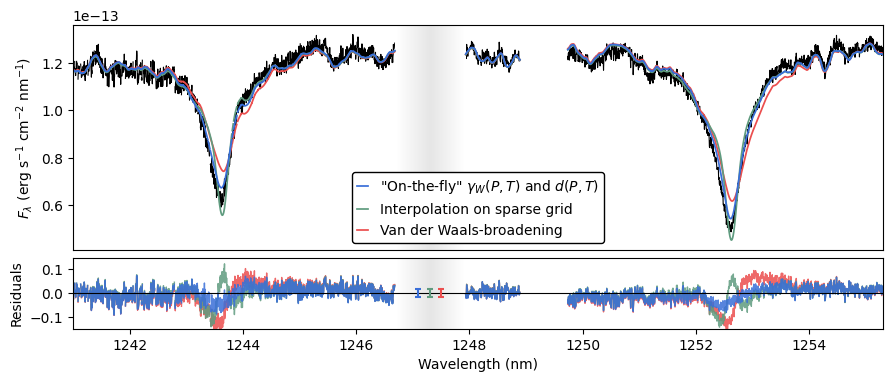

In [56]:
color_m_B_pRT_opa = '#5F9B7F'
color_m_B_vdW = '#EB4E4E'

scale = 1e-13
#xlim = (1239.5,1256.8); ylim = None
xlim = (1241.0,1255.3); ylim = (0.41e-13,1.36e-13)
#xlim = (1165.5,1181.5); ylim = None
#xlim = (1136.,1143.0); ylim = None

fig = plt.figure(figsize=(9,3.8))
gs = fig.add_gridspec(
    nrows=2, ncols=1, hspace=0.05, wspace=0., height_ratios=[0.76,0.24], 
)
ax = np.array([
    fig.add_subplot(gs[0,0]), 
    fig.add_subplot(gs[1,0]), 
])

labels = [
    #r'Parameterised $\gamma_W(P,T)$ and $d(P,T)$', 
    r'"On-the-fly" $\gamma_W(P,T)$ and $d(P,T)$', 
    r'Interpolation on sparse grid', 
    'Van der Waals-broadening', 
]

for i in range(d_spec_B.n_orders):
    for j in range(d_spec_B.n_dets):

        wave_ij = d_spec_B.wave[i,j]        
        if not ((wave_ij<xlim[1]) & (wave_ij>xlim[0])).any():
            continue

        ax[0].plot(wave_ij, d_spec_B.flux[i,j], c=color_B, lw=lw_d, zorder=-1)

        # Models
        label_ij = labels[2] if j==0 else None
        ax[0].plot(wave_ij, LogLike_B_vdW.m_flux_phi[i,j], c=color_m_B_vdW, lw=lw_m*1.25, label=label_ij)
        ax[1].plot(
            wave_ij, (d_spec_B_vdW.flux[i,j]-LogLike_B_vdW.m_flux_phi[i,j])/scale, 
            c=color_m_B_vdW, lw=lw_m, alpha=res_alpha
            )
        
        label_ij = labels[1] if j==0 else None
        ax[0].plot(wave_ij, LogLike_B_pRT_opa.m_flux_phi[i,j], c=color_m_B_pRT_opa, lw=lw_m*1.25, label=label_ij)
        ax[1].plot(
            wave_ij, (d_spec_B_pRT_opa.flux[i,j]-LogLike_B_pRT_opa.m_flux_phi[i,j])/scale, 
            c=color_m_B_pRT_opa, lw=lw_m, alpha=res_alpha
            )
        
        label_ij = labels[0] if j==0 else None
        ax[0].plot(wave_ij, LogLike_B.m_flux_phi[i,j], c=color_m_B, lw=lw_m*1.25, label=label_ij)
        ax[1].plot(
            wave_ij, (d_spec_B.flux[i,j]-LogLike_B.m_flux_phi[i,j])/scale, 
            c=color_m_B, lw=lw_m, alpha=res_alpha
            )

ax[0].legend(
    reverse=True, loc='lower center', bbox_to_anchor=(0.5,0.0), 
    handlelength=0.8, framealpha=1, facecolor='w', edgecolor='0.0', 
    )
ax[0].set(
    xticks=[], xlim=xlim, ylim=ylim, 
    ylabel=r'$F_\lambda\ \mathrm{(erg\ s^{-1}\ cm^{-2}\ nm^{-1})}$'
    )

sigma_B = Res_B.get_mean_scaled_uncertainty()
ax[-1].axhline(0, lw=ax[-1].spines['left'].get_lw(), c='k')


for sigma_i, x_i, c_i in zip(
    [sigma_B, sigma_B_pRT_opa, sigma_B_vdW], 
    #[xlim[0]+0.25, xlim[0]+0.45, xlim[0]+0.65], 
    [1246.85+0.25, 1246.85+0.45, 1246.85+0.65], 
    [color_m_B, color_m_B_pRT_opa, color_m_B_vdW]
    ):
    ax[-1].errorbar(x_i, 0.0, yerr=sigma_i[i,0]/scale, c=c_i, capsize=2, lw=1.5, capthick=1.5)

ylim = ax[0].get_ylim()
h_ratio = gs.get_height_ratios()
h_ratio = h_ratio[1]/h_ratio[0]
ylim = (-np.diff(ylim)/scale/2 * h_ratio, +np.diff(ylim)/scale/2 * h_ratio)

ax[-1].set(
    xlim=xlim, xlabel=r'Wavelength (nm)', ylim=ylim, ylabel='Residuals'
    )

indicate_ghost(ax[0], v_bary=d_spec_B.v_bary, show_text=False)
indicate_ghost(ax[-1], v_bary=d_spec_B.v_bary, show_text=False)

plt.subplots_adjust(left=0.08, bottom=0.13, top=0.93, right=0.98)
plt.savefig('./plots/J_band_K_doublet.pdf')
plt.show()

## PT-dependent opacities

In [63]:
from retrieval_base.auxiliary_functions import pickle_load
Line_i = pickle_load('../retrieval_outputs/fiducial_J_B_ret_34/test_data/Line_K_order5.pkl')

Line_i.wave_range_micron = Line_i.wave_range_micron[[5]]

In [273]:
mask_wave = (Line_i.Interp.order_indices==0)
wave = (Line_i.Interp.wave_micron[mask_wave]*1e3)

Line_i(
    params=Res_B.bestfit_params['J1226_A'], 
    #temperature=PT_B.temperature, 
    temperature=np.ones_like(Line_i.pressure)*1500., 
    mass_fractions={'K': np.ones_like(Line_i.pressure)}
    )

#Line_i.lines_to_skip = 'non-custom' #'custom'
Line_i.lines_to_skip = 'custom'
opa_others = Line_i.get_line_opacity(wave_micron=wave*1e-3, pressure=Line_i.pressure)

Line_i.lines_to_skip = 'non-custom'
opa = Line_i.get_line_opacity(wave_micron=wave*1e-3, pressure=Line_i.pressure)

4


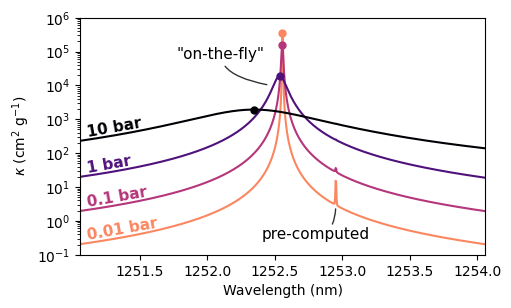

In [275]:
#cmap = plt.get_cmap('magma')
cmap = plt.get_cmap('magma_r')

fig, ax = plt.subplots(figsize=(5,3))

mask_P = (Line_i.pressure>=1e-2) & (Line_i.pressure<=1e1)
mask_P = np.isin(Line_i.pressure, 10**np.array([-2,-1,0.,1]))
#labels = [
#    '0.01', '0.03', '0.1', '0.31', '1', '3.16', '10'
#    ]
labels = [
    '0.01', '0.1', '1', '10', '100'
    ]
print(mask_P.sum())

for i, (opa_i, opa_others_i, P_i) in enumerate(
    zip(opa.T[mask_P], opa_others.T[mask_P], Line_i.pressure[mask_P])
    ):

    color_i = cmap((i+1)/mask_P.sum())

    #ax.plot(wave, opa_others_i, lw=0.5, c=color_i, ls='--', alpha=0.5)
    ax.plot(wave, opa_i, lw=1.5, c=color_i)
    ax.plot(wave[np.argmax(opa_i)], opa_i[np.argmax(opa_i)], 'o', markersize=5, c=color_i)

    x = 1251.1
    y = 10**(np.interp(x, wave, np.log10(opa_i))+0.1)
    ax.annotate(
        labels[i]+' bar', xy=(x, y), c=color_i, rotation=10, 
        fontweight='bold', fontsize=11,
    )

#ax.annotate(
#    'T=1500 K', xy=(0.02,0.96), xycoords='axes fraction', 
#    c=color_i, fontweight='bold', fontsize=13, ha='left', va='top'
#)

ax.annotate(
    'pre-computed', xy=(1252.95,3), xytext=(1252.8,0.4), 
    c='k', fontsize=11, ha='center', va='center', 
    arrowprops={
        'arrowstyle':'-', 'connectionstyle':'angle3,angleA=0,angleB=90', 
        'shrinkA':0, 'shrinkB':3, 'lw':1, 'color':'k', 'alpha':0.8, 
        }, 
)

ax.annotate(
    '"on-the-fly"', xy=(1252.47,1e4), xytext=(1252.1,8e4), 
    c='k', fontsize=11, ha='center', va='center', 
    arrowprops={
        'arrowstyle':'-', 'connectionstyle':'angle3,angleA=90,angleB=-10', 
        'shrinkA':1, 'shrinkB':3, 'lw':1, 'color':'k', 'alpha':0.8, 
        }, 
)

xlim = 1e7/Line_i.nu_0[0] + np.array([-1,1])*1.5
ylim = (1e-1,1e6)
ax.set(
    yscale='log', ylim=ylim, ylabel=r'$\kappa\ (\mathrm{cm^2\ g^{-1}})$', 
    xticks=np.arange(1251,1255,0.5), xlim=xlim, xlabel=r'Wavelength (nm)', 
    )
plt.subplots_adjust(left=0.15, right=0.96, top=0.95, bottom=0.16)
plt.savefig('./plots/J_band_opacity_treatment.pdf')
plt.show()